# Analisando o tráfego da I-94 Interstate highway

O projeto é uma análise sobre os dados de tráfego da I-94 Interstate highway. Os dados são resultados de uma coleta que aconteceu somente no sentido leste para oeste. A ideia é baseado nos indicadores de tempo, dia da semana, entre outros, entender como o tráfego é afetado.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head())
print(traffic.tail())
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

### Histograma do volume de tráfego

A seguir vemos um histograma mostrando a frequência dos volumes de tráfego.

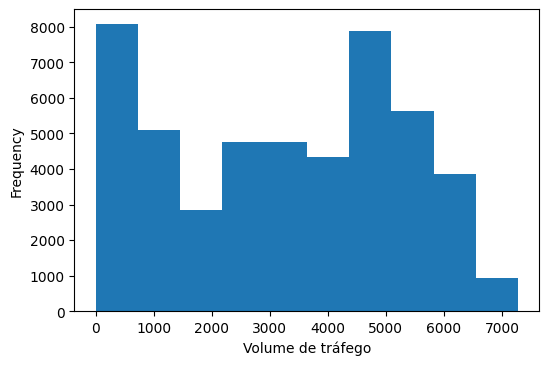

In [57]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('Volume de tráfego')
plt.show()

In [58]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Comparando quantidade de volume diurno e noturno 

Uma boa forma de analisar esse dados é separar o volume em diurno e noturno.

In [59]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7)
              & (traffic['date_time'].dt.hour < 19)]

night = traffic.copy()[(traffic['date_time'].dt.hour < 7) 
                | (traffic['date_time'].dt.hour >= 19)]
print(day.head())
print(night.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918  
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1        Clear   
12    None  288.61      0.0      0.0           1        Clea

Agora criaremos histogramas para a análise entre o dia e a noite.

(0.0, 8500.0)

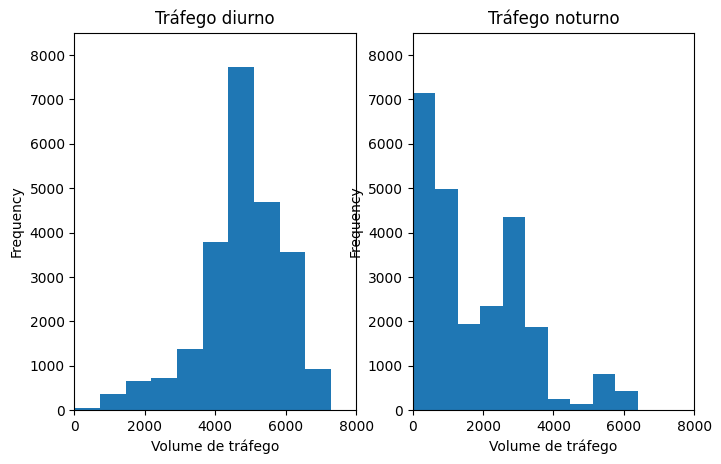

In [60]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
day['traffic_volume'].plot.hist()
plt.title('Tráfego diurno')
plt.xlabel('Volume de tráfego')
plt.xlim([0, 8000])
plt.ylim([0, 8500])

plt.subplot(1, 2, 2)
night['traffic_volume'].plot.hist()
plt.title('Tráfego noturno')
plt.xlabel('Volume de tráfego')
plt.xlim([0, 8000])
plt.ylim([0, 8500])

In [61]:
print(day['traffic_volume'].describe())
print(night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


É possível notar que o histograma diurno é um pouco assimétrico a esquerda e o volume médio é 4762. 
Já o histograma noturno é assimétrico a direita e o volume médio é 1785. 
Por termos um tráfego tão leve a noite, não vale tanto a pena o analisá-lo, já que procuramos indicadores de tráfego intenso.

### Analisando volume de tráfego por mês, semana e hora do dia

Nossa análise agora levará em consideração o mês, o dia da semana e a hora do dia. Iniciaremos pela análise mensal.

In [62]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Volume de tráfego')

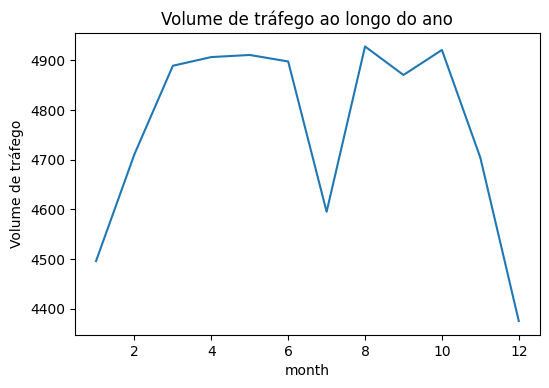

In [63]:
by_month['traffic_volume'].plot.line()
plt.title('Volume de tráfego ao longo do ano')
plt.ylabel('Volume de tráfego')

É possível notar que no final e início do ano são os meses com menos volume de tráfego.
Agora analisaremos pelo dia da semana.

In [64]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Volume de tráfego')

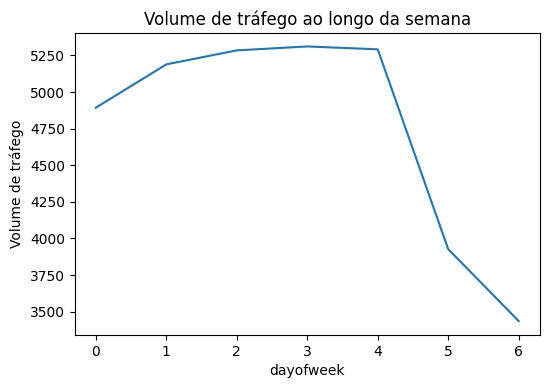

In [65]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Volume de tráfego ao longo da semana')
plt.ylabel('Volume de tráfego')

É possível notar que durante o fim de semana, o volume de tráfego cai bruscamente.
Por último analisaremos pela hora do dia, e para isso separaremos os dados em dia da semana e fim de semana.

In [66]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(1500.0, 6250.0)

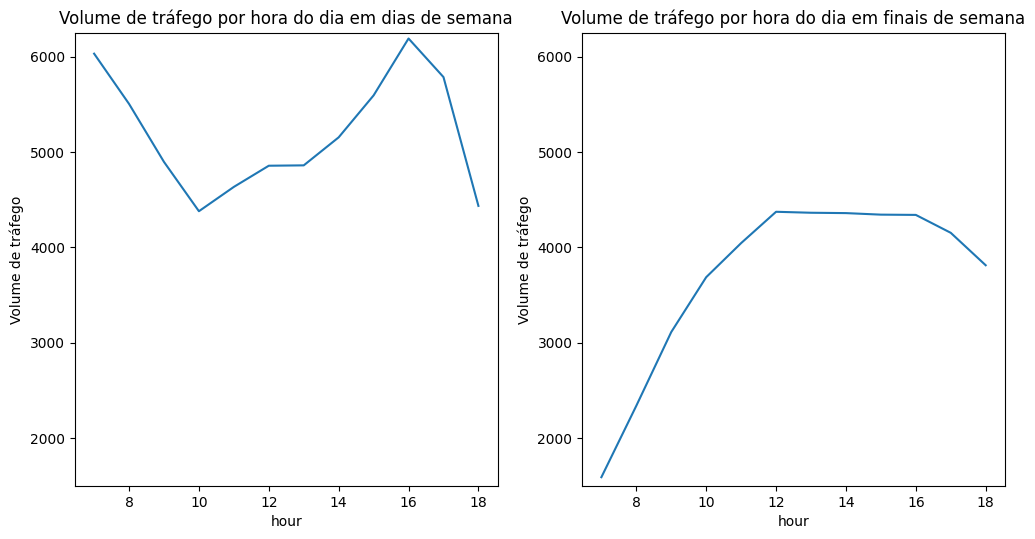

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Volume de tráfego por hora do dia em dias de semana')
plt.ylabel('Volume de tráfego')
plt.ylim([1500, 6250])

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Volume de tráfego por hora do dia em finais de semana')
plt.ylabel('Volume de tráfego')
plt.ylim([1500, 6250])

É possível notar que o horário com menor volume de tráfego em dias úteis se iguala ao horário com maior volume nos fins de semana. Os horários de pico nos dias úteis podem ser visto como as 7h da manhã e as 16h da tarde.

Podemos chegar a conclusão que o tráfego mais intenso ocorre em meses intermediários do ano, sendo janeiro e dezembro meses considerados de férias, de festa, além de serem os meses de inverno. Em relação ao dia da semana, temos que os dias úteis são os mais cheios de tráfego, pois há muitas pessoas indo e vindo do trabalho, fato comprovado também pela análise das horas do dia, onde vemos os horários de picos sendo os que tem maior volume.

### Comparando o volume do tráfego em relação ao clima

Utilizaremos agora as colunas de dados sobre clima que nos mostram se houve chuva, neve, nuvens, entre outros.

In [68]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

A correlação mais alta em relação ao volume de tráfego é a de temperatura. Faremos um gráfico de dispersão para checar essa correlação.

(230.0, 320.0)

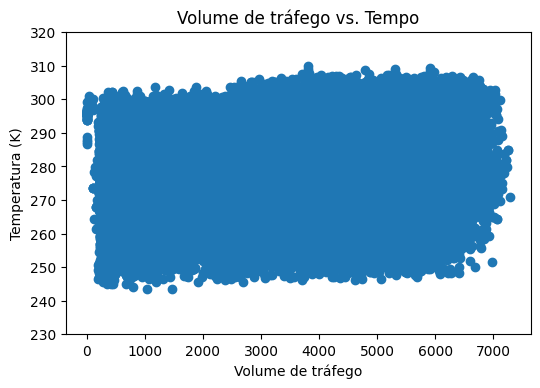

In [69]:
plt.scatter(x = traffic['traffic_volume'], y = traffic['temp'])
plt.title('Volume de tráfego vs. Tempo')
plt.xlabel('Volume de tráfego')
plt.ylabel('Temperatura (K)')
plt.ylim([230, 320]) # Há alguns outliers

Nenhuma dessas colunas demonstram uma correlação forte, não sendo confiável para análises mais precisas.
Agora usaremos as colunas não numéricas para a análise.

In [70]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

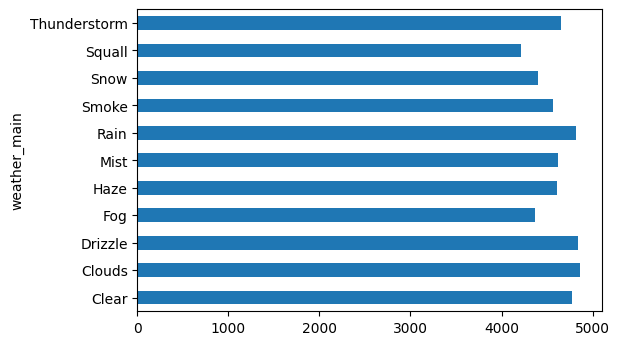

In [71]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Não há nenhum marcador que indique um tráfego intenso. Vamos checar o próximo gráfico.

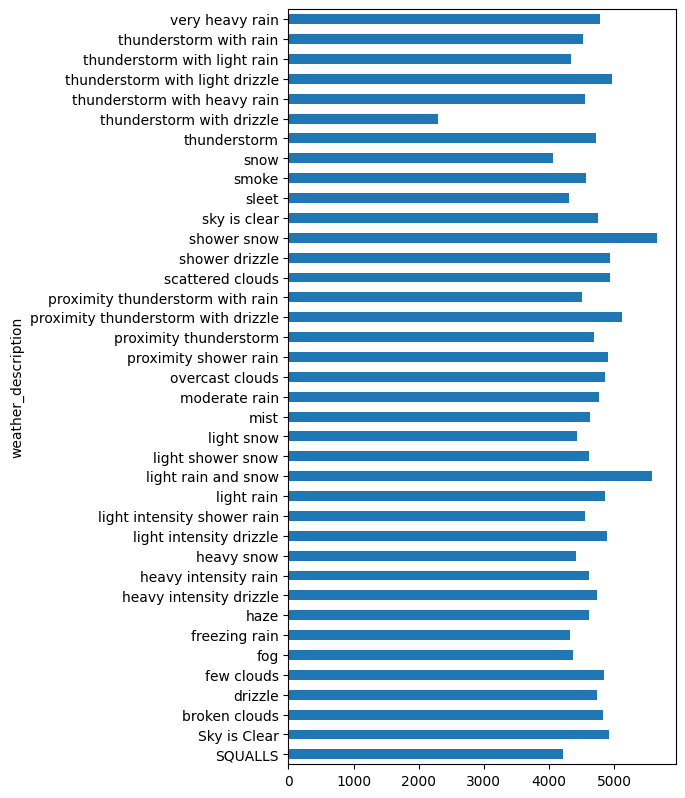

In [72]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

Agora podemos ver marcadores melhores para o tráfego intenso. Podemos ver que quando há raios e neve ou quando está chovendo neve ou havendo tempestades, tende a haver um tráfego mais intenso, pois as pessoas preferem usar carros.

### Conclusões

Nesse projeto, podemos então considerar que utilizamos marcadores de tempo e clima. Os marcadores de tempo nos disseram que:

*  Entre março e outubro temos tráfego mais intenso, sendo os meses quentes. Entre dezembro e fevereiro, temos trânsito mais leve por ser época festiva e mais fria.
*  O tráfego mais intenso ocorre nos dias úteis.
*  E nos dias úteis, ocorre nos horários de pico.

Já os marcadores de clima nos disseram o tráfego tende a ser mais intenso quando há:

*  Raios e neve;
*  Chovendo neve;
*  Tempestades com chuva.

